In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [11]:
df=pd.read_csv('adult.data.txt', names =['Age','Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Marital Status', 
                                 'Occupation', 'Relationship', 'Race', 'Gender', 'Capital Gain', 'Capital Loss',
                                 'Hours per week', 'Country', 'Target'] , sep =r'\s*,\s*', na_values ='?', engine='python')

In [12]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


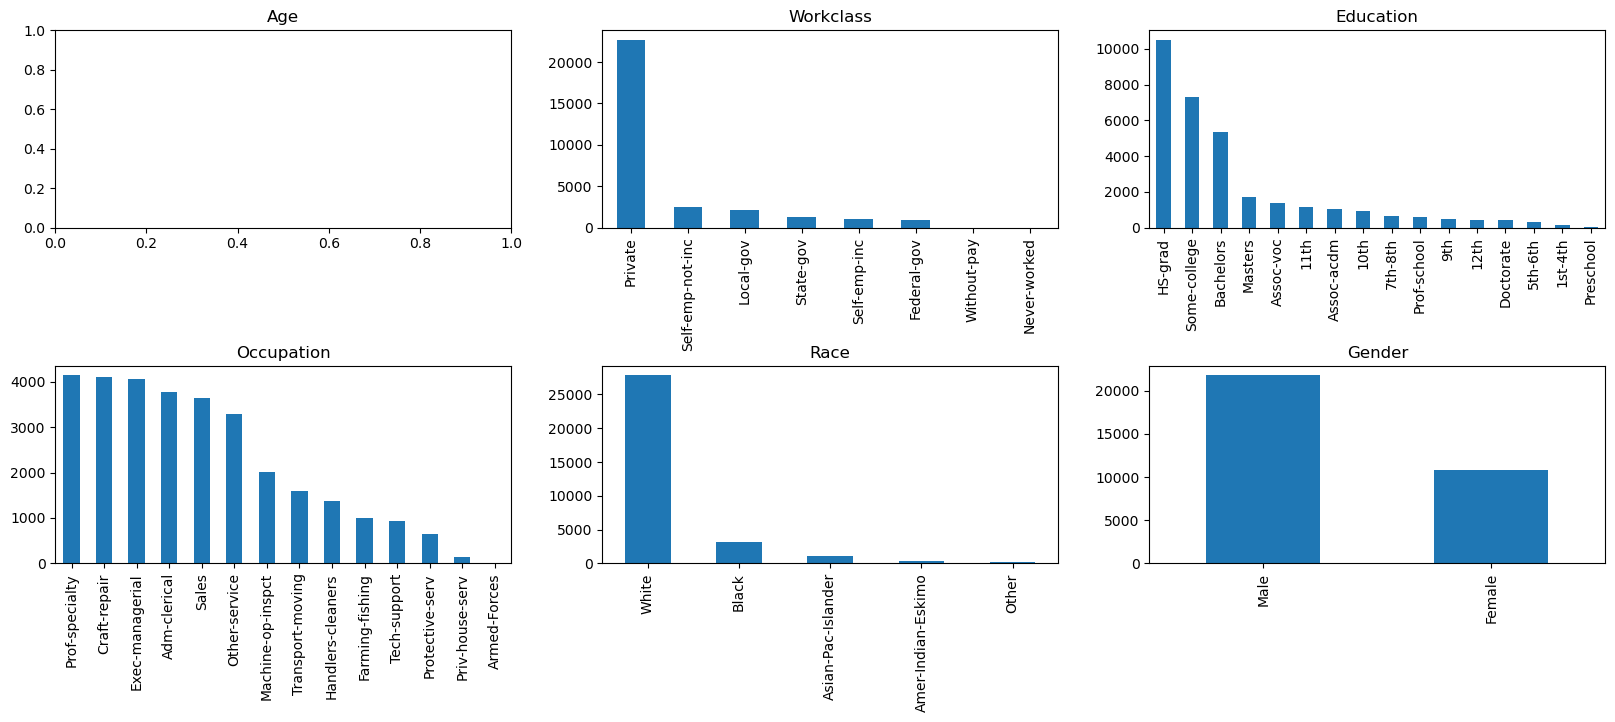

In [21]:
fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(df.shape[1]/cols))
for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if df.dtypes[column]==object:
        df[column].value_counts().plot(kind='bar',axes=ax);
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()
    

In [22]:
#encoding lables
df['Occupation']



0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
               ...        
32556         Tech-support
32557    Machine-op-inspct
32558         Adm-clerical
32559         Adm-clerical
32560      Exec-managerial
Name: Occupation, Length: 32561, dtype: object

In [25]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
df["Occupation"]=le.fit_transform(df['Occupation'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,13,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,2,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,2,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,6,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
df['Occupation'].unique()

array([ 0, 13,  2,  6,  4,  8, 12, 10, 14,  3,  9, 11,  7,  1,  5])

In [29]:
df['Target']=le.fit_transform(df['Target'].astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,13,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,2,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,2,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,6,Wife,Black,Female,0,0,40,Cuba,0


In [30]:
df['Target'].unique()

array([0, 1])

<Axes: xlabel='Education-Num'>

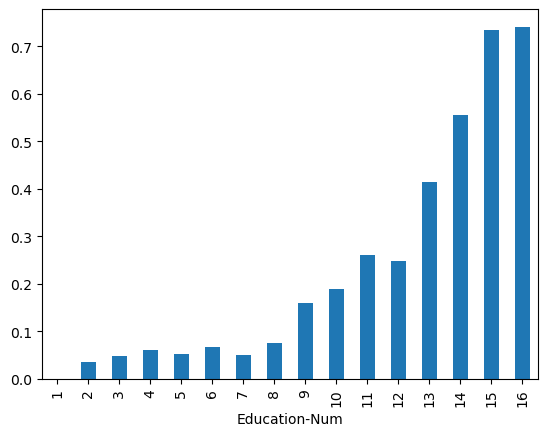

In [32]:
df.groupby('Education-Num').Target.mean().plot(kind='bar')

In [37]:
from sklearn.model_selection import train_test_split
x=df[['Education-Num','Occupation']]
y=df['Target']

#split data by 80:20 for training :test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
#import the svm model,svc c support vector classification
from sklearn.svm import SVC
#declare the SVC with no turning
classifier=SVC()
#fitting the data or training the SVM
classifier.fit(x_train,y_train)
#predicting the result nd giving the accuracy
score=classifier.score(x_test,y_test)


C:\Users\Nitesh g shet\AppData\Local\Temp\ipykernel_4356\3429392446.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat=df.corr()


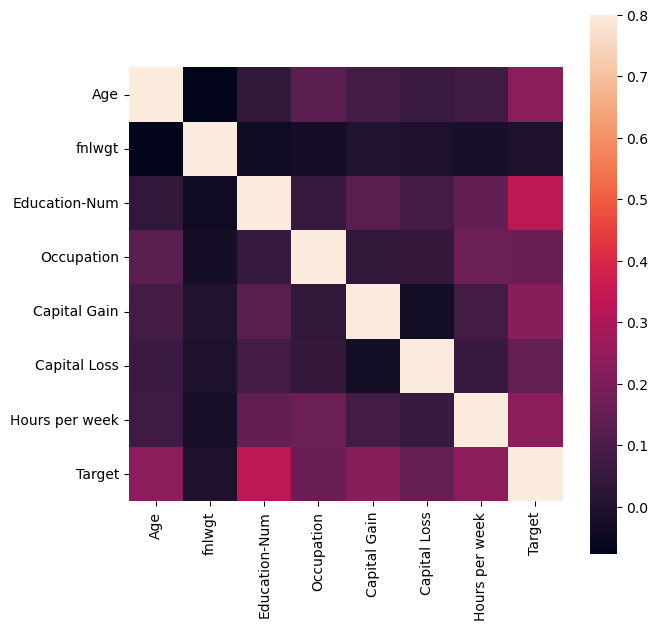

,Age,fnlwgt,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Target
Age,1.000000,-0.076646,0.036527,0.129823,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.026004,0.000432,-0.010252,-0.018768,-0.009463
Education-Num,0.036527,-0.043195,1.000000,0.048871,0.122630,0.079923,0.148123,0.335154
Occupation,0.129823,-0.026004,0.048871,1.000000,0.037642,0.042224,0.165825,0.162308
Capital Gain,0.077674,0.000432,0.122630,0.037642,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,0.042224,-0.031615,1.000000,0.054256,0.150526
Hours per week,0.068756,-0.018768,0.148123,0.165825,0.078409,0.054256,1.000000,0.229689
Target,0.234037,-0.009463,0.335154,0.162308,0.223329,0.150526,0.229689,1.000000


In [40]:
#plotting a correlation matrix to understand the data 

cormat=df.corr()
f,ax =plt.subplots(figsize=(7,7))
sns.heatmap(cormat,vmax=0.8,square=True)
plt.show()
cormat

C:\Users\Nitesh g shet\AppData\Local\Temp\ipykernel_4356\2417967372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat=df.corr()


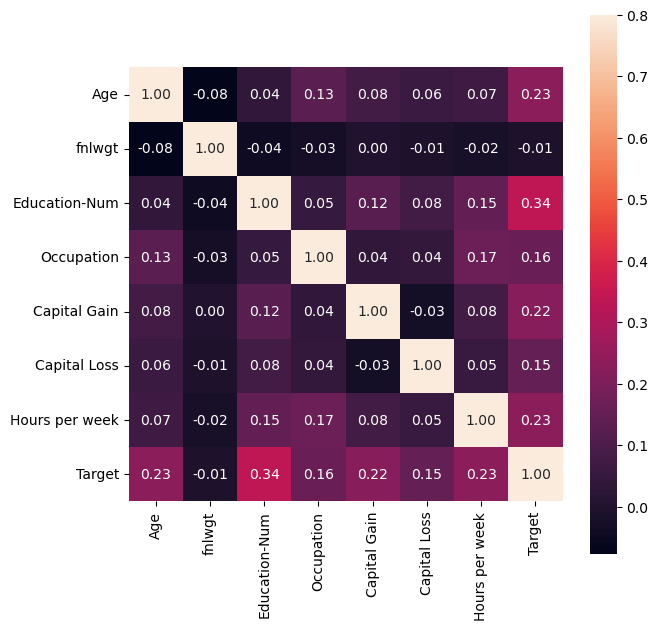

,Age,fnlwgt,Education-Num,Occupation,Capital Gain,Capital Loss,Hours per week,Target
Age,1.000000,-0.076646,0.036527,0.129823,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,-0.026004,0.000432,-0.010252,-0.018768,-0.009463
Education-Num,0.036527,-0.043195,1.000000,0.048871,0.122630,0.079923,0.148123,0.335154
Occupation,0.129823,-0.026004,0.048871,1.000000,0.037642,0.042224,0.165825,0.162308
Capital Gain,0.077674,0.000432,0.122630,0.037642,1.000000,-0.031615,0.078409,0.223329
Capital Loss,0.057775,-0.010252,0.079923,0.042224,-0.031615,1.000000,0.054256,0.150526
Hours per week,0.068756,-0.018768,0.148123,0.165825,0.078409,0.054256,1.000000,0.229689
Target,0.234037,-0.009463,0.335154,0.162308,0.223329,0.150526,0.229689,1.000000


In [43]:

cormat=df.corr()
f,ax =plt.subplots(figsize=(7,7))
sns.heatmap(cormat,vmax=0.8,square=True,annot=True,fmt='.2f')
plt.show()
cormat

In [51]:
df.Gender=le.fit_transform(df.Gender.astype(str))
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,13,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,2,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,2,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,6,Wife,Black,0,0,0,40,Cuba,0


In [55]:
x=df[['Education-Num','Occupation','Age','Hours per week',"Gender"]]
y=df['Target']

#split data by 80:20 for training :test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [56]:
#fitting the data or training the SVM
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)


0.7977890373099954


In [58]:
#setting our kernel to radial basis function with penalty parameter  c=1.0
classifier =SVC(kernel='linear',C=10)
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7977890373099954


In [59]:
from sklearn.svm import LinearSVC
#declarethe Svc eith no tuning
classifier=LinearSVC()
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

D:\PI\Newfo\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\PI\Newfo\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.758329494856441
